# Evaluation of surface pressure coefficients

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import average_surface_data

mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

exp_data = "../exp_data/"
run = "/media/andre/Elements/naca0012_shock_buffet/run/"
output = "./output/"
!mkdir -p output

print("Matplolib version: ", mpl.__version__)
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)

Matplolib version:  3.3.3
Pandas version:  1.1.3
Numpy version:  1.22.3


## Experimental pressure coefficient data

In [2]:
cp_exp = {}
names = ["x", "cp"]
for s in ["set1", "set4", "set5", "set6"]:
    cp_exp[s] = (
        pd.read_csv(exp_data + "{:s}_cp_upper.csv".format(s), sep=",", names=names, header=0),
        pd.read_csv(exp_data + "{:s}_cp_lower.csv".format(s), sep=",", names=names, header=0)
    )
cp_exp["set1"][0].head()

,x,cp
0,0.000,1.060
1,0.025,-0.532
2,0.050,-0.739
3,0.075,-0.904
4,0.100,-0.970


## Pressure coefficient for pre-onset conditions

Found 500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref0/postProcessing/surface/
Available time range t=0.0001...0.05s
Computing statistics for t=0.0495...0.05s (5 snapshots)


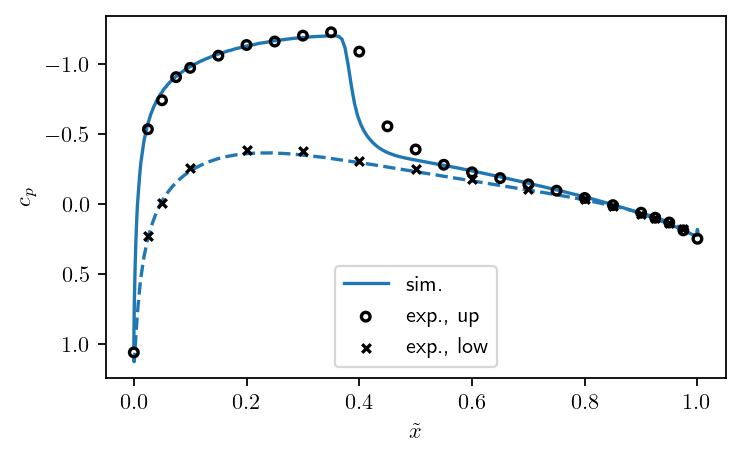

In [5]:
fig, ax = plt.subplots(figsize=(5, 3))
lw = 1.5
ms = 15

data_up, data_low = cp_exp["set1"]
sa_iddes_cases = ["rhoCF_set1_alpha2_saiddes_ref{:d}".format(i) for i in [0]]

for i, case in enumerate(sa_iddes_cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.0495)
    #ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=f"ref. {i}")
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=f"sim.")
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)
    
ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
ax.set_xlabel(r"$\tilde{x}$")
ax.legend(ncol=1, loc="lower center")
    
ax.set_ylabel(r"$c_p$")
# ax.set_title(r"$\alpha = 2^\circ$, SA-IDDES model")
plt.gca().invert_yaxis()
plt.savefig(output + "set1_cp_a2_iddes_refinement.svg", bbox_inches="tight")
plt.savefig(output + "set1_cp_a2_iddes_refinement.pdf", bbox_inches="tight")

Found 500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_sa_ref0/postProcessing/surface/
Available time range t=0.0001...0.05s
Computing statistics for t=0.0495...0.05s (5 snapshots)
Found 500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_sa_ref0/postProcessing/surface/
Available time range t=0.0001...0.05s
Computing statistics for t=0.0495...0.05s (5 snapshots)
yPlus mean/min/max upper side: 4.5093/1.0891/6.6247
yPlus mean/min/max lower side: 5.0468/0.6394/5.9952
Found 500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_sa_ref1/postProcessing/surface/
Available time range t=0.0001...0.05s
Computing statistics for t=0.0495...0.05s (5 snapshots)
Found 500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_sa_ref1/postProcessing/surface/
Available time range t=0.0001...0.05s
Computing statistics for t=0.0495...0.05s (5 snapshots)
yPlu

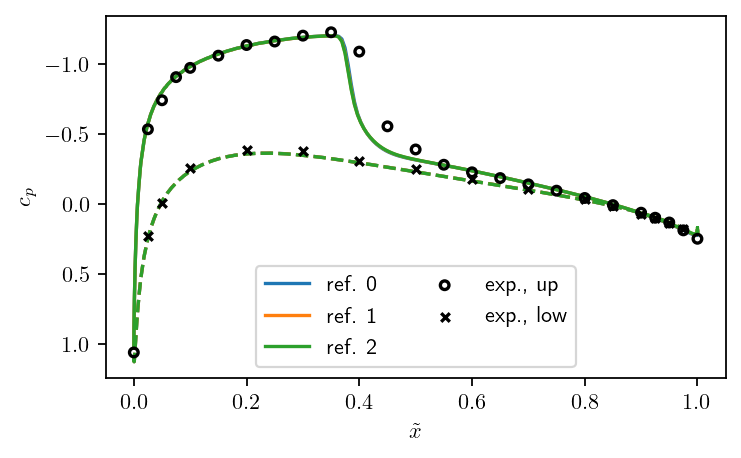

In [7]:
fig, ax = plt.subplots(figsize=(5, 3))
lw = 1.5
ms = 15

data_up, data_low = cp_exp["set1"]
sa_rans_cases = ["rhoCF_set1_alpha2_sa_ref{:d}".format(i) for i in [0, 1, 2]]

for i, case in enumerate(sa_rans_cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.0495)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=f"ref. {i}")
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)
    # print some more information
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.0495)
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    
ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
ax.set_xlabel(r"$\tilde{x}$")
ax.legend(ncol=2, loc="lower center")
    
ax.set_ylabel(r"$c_p$")
# ax.set_title(r"$\alpha = 2^\circ$, SA-RANS model")
plt.gca().invert_yaxis()
plt.savefig(output + "set1_cp_a2_rans_refinement.pdf", bbox_inches="tight")

Found 500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref0_tan0/postProcessing/surface/
Available time range t=0.0001...0.05s
Computing statistics for t=0.0495...0.05s (5 snapshots)
Found 500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref0/postProcessing/surface/
Available time range t=0.0001...0.05s
Computing statistics for t=0.0495...0.05s (5 snapshots)


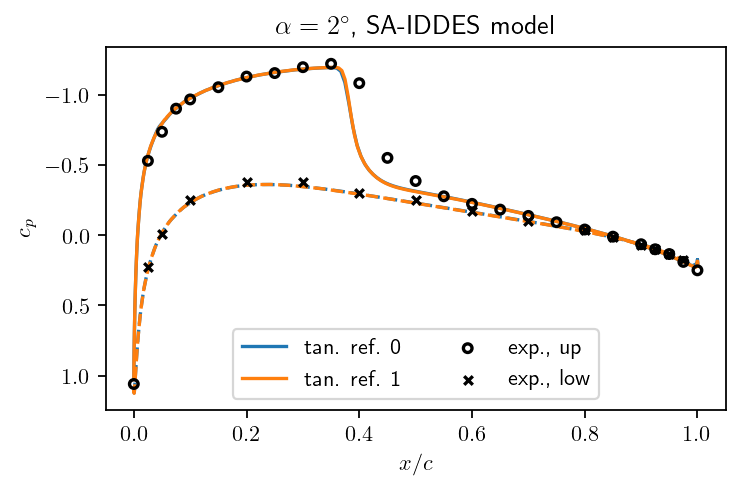

In [5]:
fig, ax = plt.subplots(figsize=(5, 3))
lw = 1.5
ms = 15

data_up, data_low = cp_exp["set1"]
sa_iddes_cases = ["rhoCF_set1_alpha2_saiddes_ref{:s}".format(s) for s in ["0_tan0", "0"]]

for i, case in enumerate(sa_iddes_cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.0495)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=f"tan. ref. {i}")
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)
    
ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
ax.set_xlabel(r"$x/c$")
ax.legend(ncol=2, loc="lower center")
    
ax.set_ylabel(r"$c_p$")
ax.set_title(r"$\alpha = 2^\circ$, SA-IDDES model")
plt.gca().invert_yaxis()
plt.savefig(output + "set1_cp_a2_iddes_tan_ref.pdf", bbox_inches="tight")

Found 500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref0/postProcessing/surface/
Available time range t=0.0001...0.05s
Computing statistics for t=0.0495...0.05s (5 snapshots)
yPlus mean/min/max upper side: 4.5600/1.1808/6.6309
yPlus mean/min/max lower side: 5.0875/0.6486/6.0680
Found 500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref0/postProcessing/surface/
Available time range t=0.0001...0.05s
Computing statistics for t=0.0495...0.05s (5 snapshots)
Found 50 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_wf_g150/postProcessing/surface/
Available time range t=0.001...0.05s
Computing statistics for t=0.049...0.05s (1 snapshots)
yPlus mean/min/max upper side: 5.5630/1.4404/8.5013
yPlus mean/min/max lower side: 6.1720/0.9552/7.4798
Found 50 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_wf_g

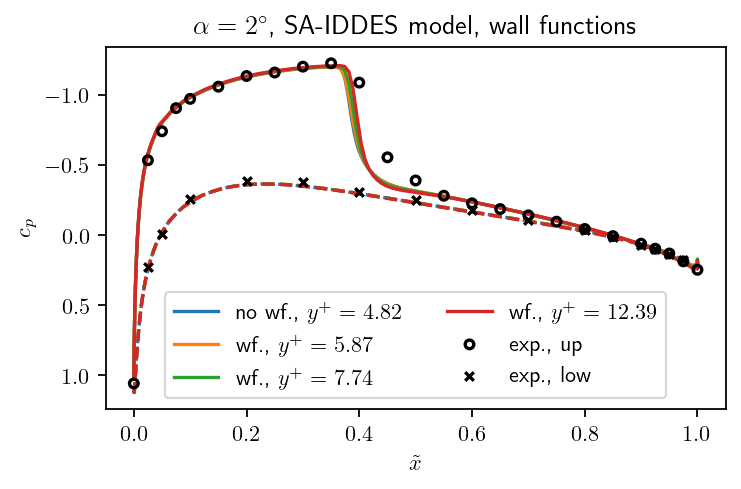

In [6]:
fig, ax = plt.subplots(figsize=(5, 3))
lw = 1.5
ms = 15

data_up, data_low = cp_exp["set1"]
sa_iddes_cases = ["rhoCF_set1_alpha2_saiddes_{:s}".format(s) for s in ["ref0", "wf_g150", "wf_g100", "wf_g50"]]
labels = ["no wf.", "wf.", "wf.", "wf."]

for i, case in enumerate(sa_iddes_cases):
    path = run + case + "/postProcessing/surface/"
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.0495)
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    yp_mean = np.concatenate((data_yp[2], data_yp[3])).mean()
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.0495)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=r"{:s}, $y^+= {:2.2f}$".format(labels[i], yp_mean))
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)
    
    
ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
ax.set_xlabel(r"$\tilde{x}$")
ax.legend(ncol=2, loc="lower center")
    
ax.set_ylabel(r"$c_p$")
ax.set_title(r"$\alpha = 2^\circ$, SA-IDDES model, wall functions")
plt.gca().invert_yaxis()
plt.savefig(output + "set1_cp_a2_iddes_wf.pdf", bbox_inches="tight")

## Pressure coefficient for buffet conditions

Found 2500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0/postProcessing/surface/
Available time range t=0.0001...0.25s
Computing statistics for t=0.031...0.231s (2000 snapshots)
Found 2500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref1/postProcessing/surface/
Available time range t=0.0001...0.25s
Computing statistics for t=0.031...0.231s (2000 snapshots)
Found 2500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref2/postProcessing/surface/
Available time range t=0.0001...0.25s
Computing statistics for t=0.031...0.231s (2000 snapshots)


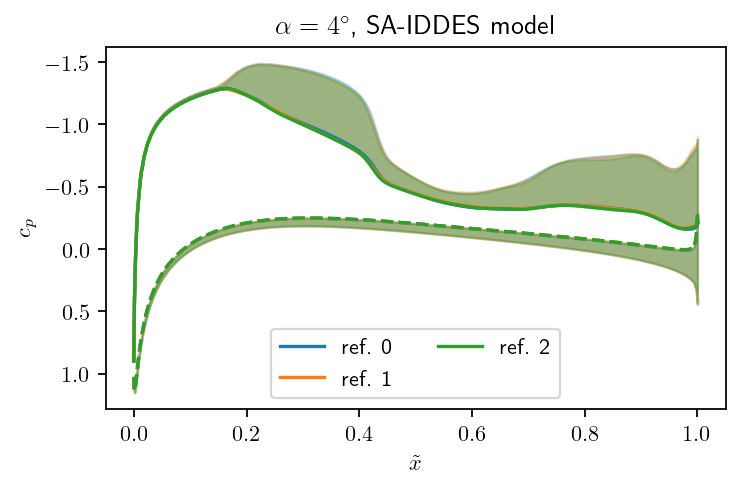

In [7]:
fig, ax = plt.subplots(figsize=(5, 3))
lw = 1.5
ms = 15

sa_iddes_cases = ["rhoCF_set1_alpha4_saiddes_ref{:d}".format(i) for i in [0, 1, 2]]

scale = 1.0
for i, case in enumerate(sa_iddes_cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.031, 0.231)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=f"ref. {i}")
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)
    ax.fill_between(data[0], data[2], data[2]-scale*data[4], color=f"C{i}", alpha=0.3)
    ax.fill_between(data[1], data[3]+scale*data[5], data[3], color=f"C{i}", alpha=0.3)
    
ax.set_xlabel(r"$\tilde{x}$")
ax.legend(ncol=2, loc="lower center")
    
ax.set_ylabel(r"$c_p$")
ax.set_title(r"$\alpha = 4^\circ$, SA-IDDES model")
plt.gca().invert_yaxis()
plt.savefig(output + "set1_cp_a4_iddes_refinement.svg", bbox_inches="tight")
plt.savefig(output + "set1_cp_a4_iddes_refinement.pdf", bbox_inches="tight")

In [8]:
case2D = f"{run}rhoCF_set1_alpha4_saiddes_ref0/postProcessing/surface/"
case3D = f"{run}rhoCF_set1_alpha4_saiddes_ref0_z25/postProcessing/surface/"
data2D = average_surface_data(case2D, "total(p)_coeff_airfoil.raw", 0.031, 0.231)
data3D = average_surface_data(case3D, "total(p)_coeff_airfoil.raw", 0.0326, 0.1015)

Found 2500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0/postProcessing/surface/
Available time range t=0.0001...0.25s
Computing statistics for t=0.031...0.231s (2000 snapshots)
Found 2500 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0_z25/postProcessing/surface/
Available time range t=0.0001...0.25s
Computing statistics for t=0.0326...0.1015s (689 snapshots)


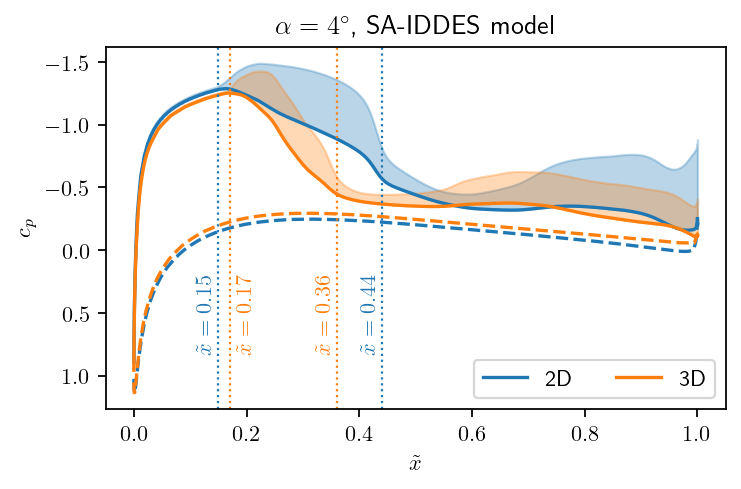

In [9]:
fig, ax = plt.subplots(figsize=(5, 3))

scale = 1.0
lw = 1.5
ax.fill_between(data2D[0], data2D[2], data2D[2]-scale*data2D[4], color=f"C0", alpha=0.3)
ax.fill_between(data3D[0], data3D[2], data3D[2]-scale*data3D[4], color=f"C1", alpha=0.3)
ax.plot(data2D[0], data2D[2], c="C0", ls="-", lw=lw, label=f"2D")
ax.plot(data2D[1], data2D[3], c="C0", ls="--", lw=lw)
ax.plot(data3D[0], data3D[2], c="C1", ls="-", lw=lw, label=f"3D")
ax.plot(data3D[1], data3D[3], c="C1", ls="--", lw=lw)
ax.axvline(0.15, ls=":", c="C0", lw=1)
ax.axvline(0.44, ls=":", c="C0", lw=1)
ax.axvline(0.17, ls=":", c="C1", lw=1)
ax.axvline(0.36, ls=":", c="C1", lw=1)
ax.text(0.11, 0.8, r"$\tilde{x}=0.15$", c="C0", rotation=90)
ax.text(0.40, 0.8, r"$\tilde{x}=0.44$", c="C0", rotation=90)
ax.text(0.18, 0.8, r"$\tilde{x}=0.17$", c="C1", rotation=90)
ax.text(0.32, 0.8, r"$\tilde{x}=0.36$", c="C1", rotation=90)

ax.set_xlabel(r"$\tilde{x}$")
ax.legend(ncol=2, loc="lower right")
    
ax.set_ylabel(r"$c_p$")
ax.set_title(r"$\alpha = 4^\circ$, SA-IDDES model")
plt.gca().invert_yaxis()
plt.savefig(output + "set1_cp_a4_iddes_2D_3D.svg", bbox_inches="tight")
plt.savefig(output + "set1_cp_a4_iddes_2D_3D.pdf", bbox_inches="tight")